### THIAW Mouhamadou Lamine Bara


### Modeles Stochastiques en Finance MAP 552


#           Computer Problem Set 1.2
#                        Simulation of the Brownian motion

In [210]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
T=1

# 1. Forward simulation of $({W_{t_{i}^n}})_{1 \leq i\leq n}$

(a)  Given that  W is a standart brownian motion process, the increments
$ W_{t^n_i} - W_{t^n_{i-1}},\ i\in\{1,\ldots,2^n\}$ are iid random variables following $\mathcal N(0,\Delta T)$.\
Thus, $Z_i = \frac{1}{\sqrt{\Delta T}}\left(W_{t^n_i} - W_{t^n_{i-1}}\right)$  are iid $\mathcal N(0,1)$ random variables


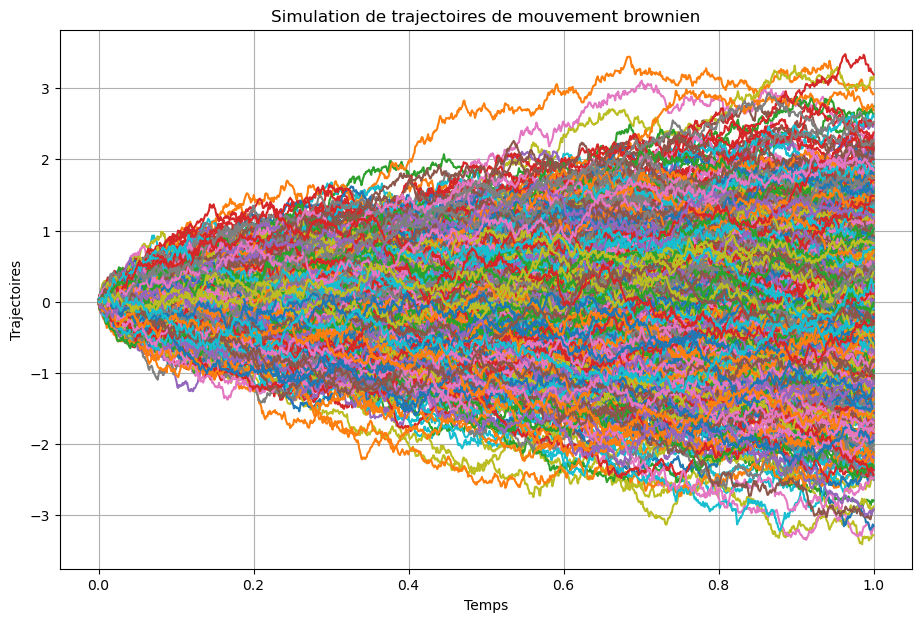

In [212]:
n=10
max=2**n
delta=T/max
nombre_de_simulations=1000
def simulate(T,max,nombre_de_simulations):
    time=np.linspace(0,T,max)
    Z=np.random.normal(0,np.sqrt(delta),(nombre_de_simulations,max))
    W = np.zeros((nombre_de_simulations, max))
    for i in range(1, max):
        W[:, i] = W[:, i-1] + Z[:, i-1]
    
    return time, W
t,W=simulate(T,max,nombre_de_simulations)

plt.figure(figsize=(11, 7))
for i in range(nombre_de_simulations):
    plt.plot(t, W[i, :])

plt.xlabel('Temps')
plt.ylabel('Trajectoires')
plt.title('Simulation de trajectoires de mouvement brownien')
plt.grid(True)
plt.show()



We have normally: 
$$
\begin{aligned}
    \mathbb E[W_T] &= 0, \mathrm{Var}[W_T] = T \\
    \mathrm{Cov}(W_T, W_{T/2}) &= \mathrm{Cov}(W_T-W_{T/2}+W_{T/2}, W_{T/2}) = \mathrm{Cov}(W_{T/2}, W_{T/2}) = \mathrm{Var}[W_{T/2}] = T/2
\end{aligned}
$$

(c): Compute the corresponding sample mean and variance of $W_T$ , and
the sample covariance of $ (W_T , W_{T /2})$. Comment the results by varying the value of n

In [213]:
# Compute samples mean, variance for varying n
## Forward simulation
Nmin = 4
Nmax = 12
moyennes = []
variances = []
cov_vals = []

for n in range(Nmin, Nmax):
    print("Pas de temps: %s" % 2**n)
    t,W = simulate(T,2**n, 1000)

    mu = np.mean(W[-1])
    moyennes.append(mu)
    print("Moyenne: %s" % mu)

    sigma = np.var(W[-1], ddof=1)
    variances.append(sigma)
    print("Variance: %s" % sigma)

    cov_matrix = np.cov(W[:, -1], W[:, 2**(n-1)]) 
    cov = cov_matrix[0][1] 
    cov_vals.append(cov)
    print("Covariance of (WT, WT/2): %s" % cov)
    print()


Pas de temps: 16
Moyenne: -0.10729725241249807
Variance: 0.0023866137054560253
Covariance of (WT, WT/2): 0.008003800035702094

Pas de temps: 32
Moyenne: -0.14512777185842762
Variance: 0.006445579861022695
Covariance of (WT, WT/2): 0.014455000889626184

Pas de temps: 64
Moyenne: -0.0412173345791165
Variance: 0.006143644282415457
Covariance of (WT, WT/2): 0.035378851478039604

Pas de temps: 128
Moyenne: -0.07435419516980855
Variance: 0.012117815051980228
Covariance of (WT, WT/2): 0.06298274557536528

Pas de temps: 256
Moyenne: 0.5020009169405627
Variance: 0.157546081054416
Covariance of (WT, WT/2): 0.12548010373268426

Pas de temps: 512
Moyenne: -0.2765696545570268
Variance: 0.023982252583078983
Covariance of (WT, WT/2): 0.24941723328711382

Pas de temps: 1024
Moyenne: -1.2943762251987878
Variance: 0.4432923778325355
Covariance of (WT, WT/2): 0.4901429736419613

Pas de temps: 2048
Moyenne: 1.185114781422009
Variance: 0.43338154459131717
Covariance of (WT, WT/2): 0.9741504015669133



Comment the results by varying the value of n.

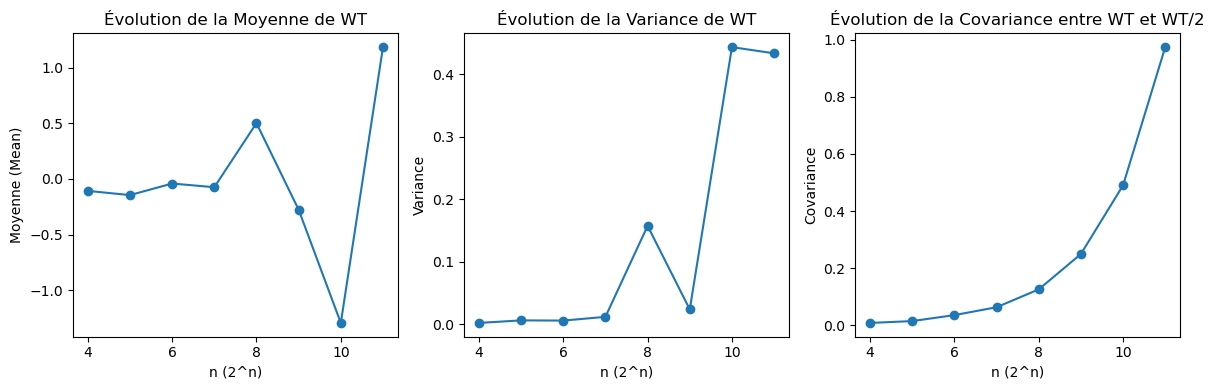

In [214]:
n_values = list(range(Nmin, Nmax))
plt.figure(figsize=(12, 4))

# Tracé de la moyenne
plt.subplot(131)
plt.plot(n_values, moyennes, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Moyenne (Mean)')
plt.title('Évolution de la Moyenne de WT')

# Tracé de la variance
plt.subplot(132)
plt.plot(n_values, variances, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Variance')
plt.title('Évolution de la Variance de WT')

# Tracé de la covariance
plt.subplot(133)
plt.plot(n_values, cov_vals, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Covariance')
plt.title('Évolution de la Covariance entre WT et WT/2')

plt.tight_layout()
plt.show()

Comments: We don't see any convergence by increaing the value of n 

## Backward simulation

(a) We now show that  $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2)$ has a $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ distribution.

For that, We will use the characteristic function

In order to compute the characteristic function, we will add and retire $\frac{W_{s_1} + W_{s_2}}{2}$ in the formula near to $e^{iuW_{\bar s}}$



We  have :

\begin{aligned}
    \mathbb E\left[ e^{iuW_{\bar s}} \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right]
   
    &=
    e^{iu\bar x}\mathbb E\left[ \exp\left(iu \left(W_{\bar s}-\frac{W_{s_1} + W_{s_2}}{2}\right)\right) \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right]  \\
    &= e^{iu\bar x}\mathbb E\left[ e^{-iu(W_{\bar s} - W_{s_1})/2} e^{-iu(W_{\bar s}-W_{s_2})/2} \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right] \\
    &= e^{iu\bar x} e^{-\frac 12u^2(\bar s - s_1)/4} e^{-\frac12u^2(s_2 - \bar s)/4} \ \text{(Independance des increments d'un mouvement brownien )} \\
    &= \exp\left(iu\bar x - \frac 12 u^2\frac{s_2 - s_1}4\right) \ \text{(Or on connait la fonction characteristique d'une gaussienne)}\\
\end{aligned}
$$

On en deduit que $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2)$ est distribuee suivant la loi normale  $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ 

(b) Justify that conditional distribution of $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\not\in[s_1,s_2]})$ is   $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ 

 The independence of increments outside the interval [s1, s2] doesn't affect the conditional distribution of $W_{\bar s}$ given the specified values.

We can by the same way calculate the characteristic function of $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\not\in[s_1,s_2]})$  and we will find that it is distributed following   $\mathcal N(\bar x, \frac{s_2-s_1}{4})$ 

In [215]:
def backward_simulate_discretized_brownian(T, n):
    max_steps = 2**n
    time = np.linspace(0, T, max_steps + 1)
    W = np.zeros(max_steps + 1)
    for i in range(1, max_steps + 1):
        x1 = W[i - 1]
        x2 = W[i]
        mean_conditional = (x1 + x2) / 2 
        variance_conditional = (time[i] - time[i - 1]) / 4
        W[i - 1] = np.random.normal(mean_conditional, np.sqrt(variance_conditional))
    
    return  W

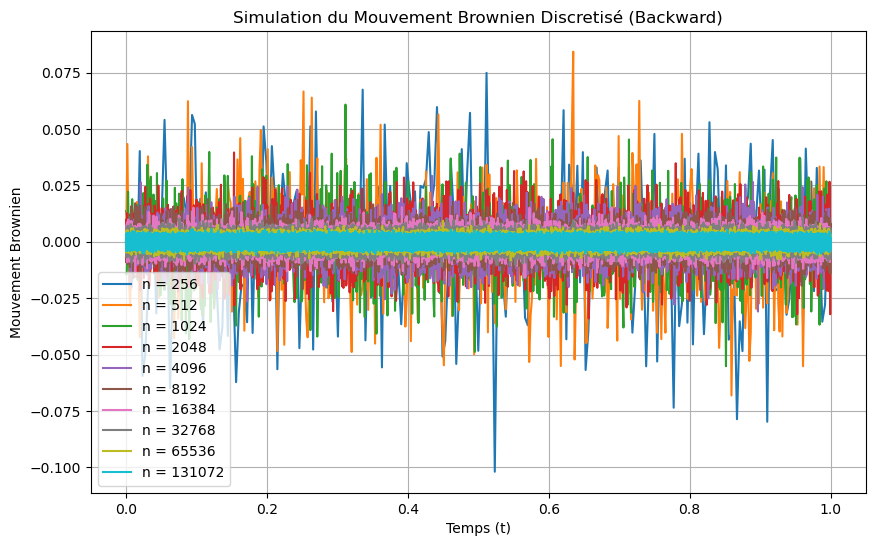

In [216]:
T = 1
n_values = [ 8,9,10,11,12,13, 14, 15, 16, 17]  



plt.figure(figsize=(10, 6))

for n in n_values:
    t = np.linspace(0, T, 2**n+1)
    W = backward_simulate_discretized_brownian(T, n)
    plt.plot(t, W, label=f'n = {2**n}')

plt.xlabel('Temps (t)')
plt.ylabel('Mouvement Brownien')
plt.title('Simulation du Mouvement Brownien Discretisé (Backward)')
plt.legend()
plt.grid(True)

plt.show()



In [217]:
n_values = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
moyennes = []
variances = []
covariances = []

for n in n_values:
    W = backward_simulate_discretized_brownian(T, n)
    moyennes.append(np.mean(W))
    variances.append(np.var(W, ddof=1))
    covariances.append(np.cov(W, W/2, ddof=1)[0, 1])



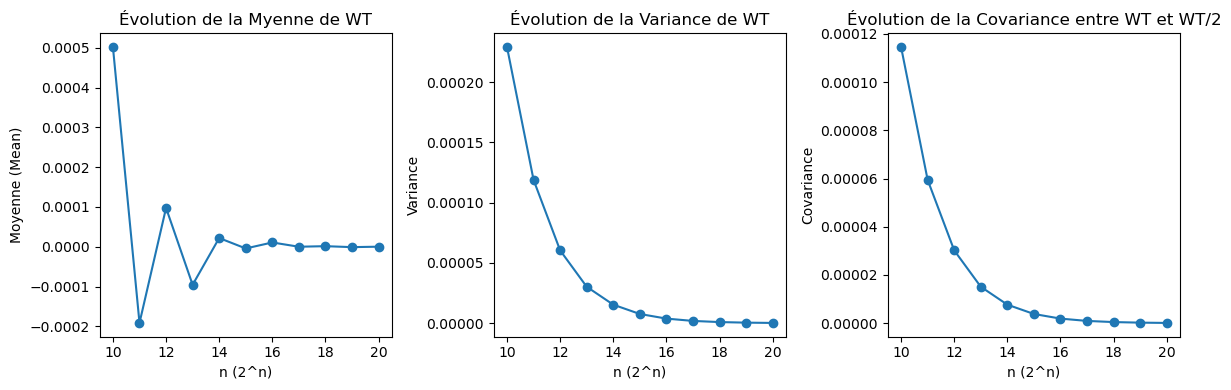

In [218]:
# Tracé de la moyenne
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(n_values, moyennes, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Moyenne (Mean)')
plt.title('Évolution de la Myenne de WT')

# Tracé de la variance
plt.subplot(132)
plt.plot(n_values, variances, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Variance')
plt.title('Évolution de la Variance de WT')

# Tracé de la covariance
plt.subplot(133)
plt.plot(n_values, covariances, marker='o')
plt.xlabel('n (2^n)')
plt.ylabel('Covariance')
plt.title('Évolution de la Covariance entre WT et WT/2')

plt.tight_layout()
plt.show()

On constate que la moyenne, la variance et la covariance tendent vers 0 en fonction de n

(3)

In [219]:
var_qua=[]
all_values=list(np.arange(10,21))


In [220]:
T = 1
n = 10
max = 2**n
num_samples = 1000

for i in all_values:
    time_forward, W_forward = simulate(T, max, num_samples)
    W_backward = backward_simulate_discretized_brownian(T, n)[:len(W_forward)] ## Redimensionnement 
    ## due a la difference des decoupages 1000 contre 1024 pour 10
    quadratic_variation = np.mean((W_forward[:, -1] - W_backward)**2)
    var_qua.append(quadratic_variation)

depart_de_la_limite= np.abs(np.array(var_qua) - T)    

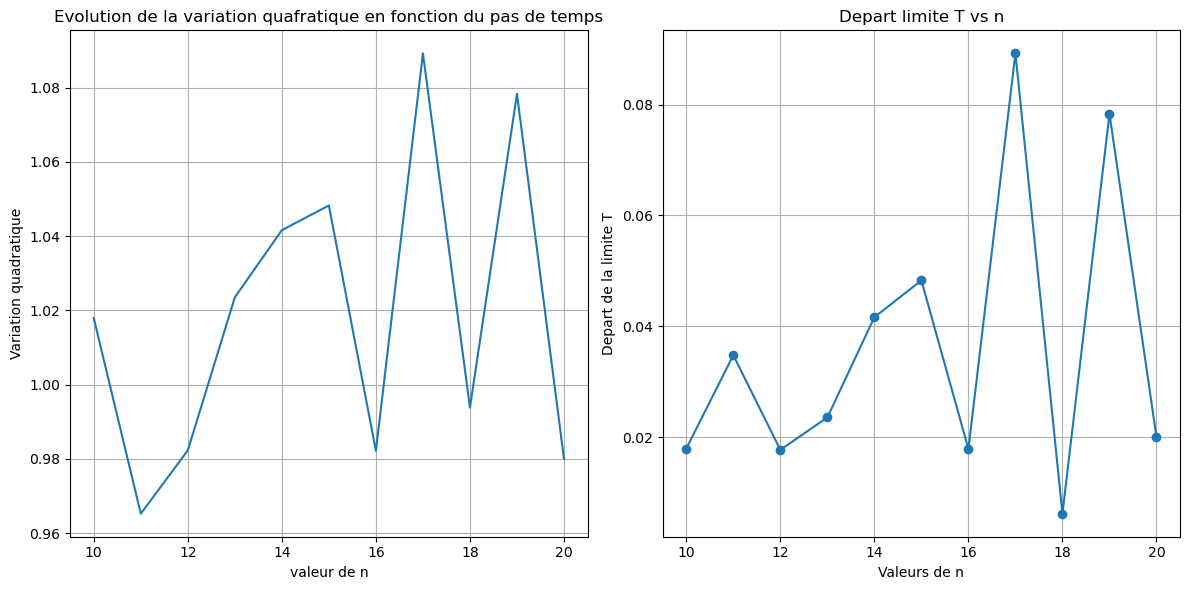

In [221]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(all_values,var_qua)
plt.xlabel('valeur de n')
plt.ylabel('Variation quadratique')
plt.title('Evolution de la variation quafratique en fonction du pas de temps')
plt.grid(True)



plt.subplot(122)
plt.plot(all_values, depart_de_la_limite, marker='o')
plt.xlabel('Valeurs de n')
plt.ylabel('Depart de la limite T')
plt.title('Depart limite T vs n')

plt.grid(True)
plt.tight_layout()



plt.show()

END